In [161]:
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [162]:
path_text_baseline = "../../acc_baseline.txt"
path_text_yoda = "../../acc_YoDa.txt"

In [163]:
# read the text files
with open(path_text_baseline) as f:
    content_baseline = f.readlines()
content_baseline = [x.strip() for x in content_baseline]
print(content_baseline)

['name\tepoch\tp\tr\tmAP_0.5\tmAP_0.5:0.95', 'YOLOv5s (augment)\t545\t0.47786\t0.69565\t0.60029\t0.54788', 'YOLOv5n (augment)\t295\t0.57349\t0.64335\t0.60418\t0.52301', 'YOLOv5s (no_augment)\t88\t0.40526\t0.52174\t0.49158\t0.38265', 'YOLOv5n (no_augment)\t80\t0.35519\t0.47826\t0.40164\t0.3328']


In [164]:
with open(path_text_yoda) as f:
    content_yoda = f.readlines()
content_yoda = [x.strip() for x in content_yoda]
print(content_yoda)

['name\tepoch\tp\tr\tmAP_0.5\tmAP_0.5:0.95', 'YoDa + YOLOv5s (augment)\t406\t0.82151\t0.65217\t0.72648\t0.60876', 'YoDa + YOLOv5n (augment)\t211\t0.52066\t0.52174\t0.62892\t0.5499', 'YoDa + YOLOv5s (no_augment)\t95\t0.38989\t0.73913\t0.4843\t0.41971', 'YoDa + YOLOv5n (no_augment)\t89\t0.49242\t0.56522\t0.45741\t0.41607']


In [165]:
# ignore first line
content_baseline = content_baseline[1:]
content_yoda = content_yoda[1:]

In [166]:
content_baseline = [x.split('\t') for x in content_baseline]
content_yoda = [x.split('\t') for x in content_yoda]

In [167]:
content_baseline

[['YOLOv5s (augment)', '545', '0.47786', '0.69565', '0.60029', '0.54788'],
 ['YOLOv5n (augment)', '295', '0.57349', '0.64335', '0.60418', '0.52301'],
 ['YOLOv5s (no_augment)', '88', '0.40526', '0.52174', '0.49158', '0.38265'],
 ['YOLOv5n (no_augment)', '80', '0.35519', '0.47826', '0.40164', '0.3328']]

In [168]:
# create pandas dataframe with columns: Augmentation, epoch, precision, recall, mAP50, mAP50:95
df_baseline = pd.DataFrame(content_baseline, columns=['model', 'epoch', 'precision', 'recall', 'mAP50', 'mAP50:95'])
df_baseline

,model,epoch,precision,recall,mAP50,mAP50:95
0,YOLOv5s (augment),545,0.47786,0.69565,0.60029,0.54788
1,YOLOv5n (augment),295,0.57349,0.64335,0.60418,0.52301
2,YOLOv5s (no_augment),88,0.40526,0.52174,0.49158,0.38265
3,YOLOv5n (no_augment),80,0.35519,0.47826,0.40164,0.3328


In [169]:
df_YoDa = pd.DataFrame(content_yoda, columns=['model', 'epoch', 'precision', 'recall', 'mAP50', 'mAP50:95'])
df_YoDa

,model,epoch,precision,recall,mAP50,mAP50:95
0,YoDa + YOLOv5s (augment),406,0.82151,0.65217,0.72648,0.60876
1,YoDa + YOLOv5n (augment),211,0.52066,0.52174,0.62892,0.5499
2,YoDa + YOLOv5s (no_augment),95,0.38989,0.73913,0.4843,0.41971
3,YoDa + YOLOv5n (no_augment),89,0.49242,0.56522,0.45741,0.41607


In [170]:
# keep only row that contains 5s in model size
df_s = df_baseline[df_baseline['model'].str.contains('YOLOv5s')]
df_n = df_baseline[df_baseline['model'].str.contains('YOLOv5n')]

In [171]:
# append rows in YoDa which contains 5s in model size
df_s = df_s.append(df_YoDa[df_YoDa['model'].str.contains('YOLOv5s')], ignore_index=True)
df_n = df_n.append(df_YoDa[df_YoDa['model'].str.contains('YOLOv5n')], ignore_index=True)

In [172]:
df_s

,model,epoch,precision,recall,mAP50,mAP50:95
0,YOLOv5s (augment),545,0.47786,0.69565,0.60029,0.54788
1,YOLOv5s (no_augment),88,0.40526,0.52174,0.49158,0.38265
2,YoDa + YOLOv5s (augment),406,0.82151,0.65217,0.72648,0.60876
3,YoDa + YOLOv5s (no_augment),95,0.38989,0.73913,0.4843,0.41971


In [173]:
df_n


,model,epoch,precision,recall,mAP50,mAP50:95
0,YOLOv5n (augment),295,0.57349,0.64335,0.60418,0.52301
1,YOLOv5n (no_augment),80,0.35519,0.47826,0.40164,0.3328
2,YoDa + YOLOv5n (augment),211,0.52066,0.52174,0.62892,0.5499
3,YoDa + YOLOv5n (no_augment),89,0.49242,0.56522,0.45741,0.41607


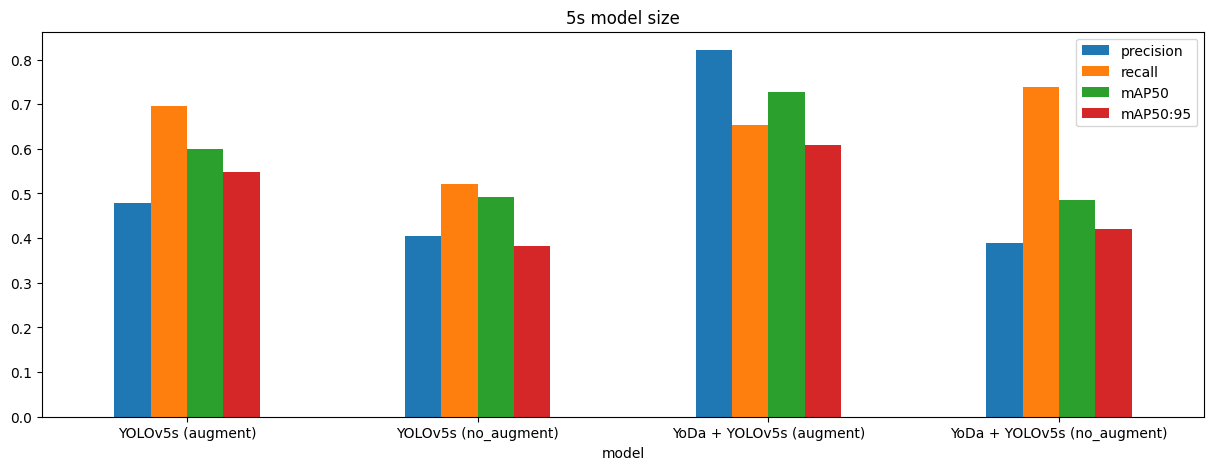

In [174]:
# plotting df_s with bar plot
df_s = df_s.astype({'precision': 'float', 'recall': 'float', 'mAP50': 'float', 'mAP50:95': 'float'})
df_s.plot.bar(x='model', y=['precision', 'recall', 'mAP50', 'mAP50:95'], rot=0, figsize=(15,5), title='5s model size')
plt.show()

In [175]:
df_s

,model,epoch,precision,recall,mAP50,mAP50:95
0,YOLOv5s (augment),545,0.47786,0.69565,0.60029,0.54788
1,YOLOv5s (no_augment),88,0.40526,0.52174,0.49158,0.38265
2,YoDa + YOLOv5s (augment),406,0.82151,0.65217,0.72648,0.60876
3,YoDa + YOLOv5s (no_augment),95,0.38989,0.73913,0.48430,0.41971


In [176]:
df_n

,model,epoch,precision,recall,mAP50,mAP50:95
0,YOLOv5n (augment),295,0.57349,0.64335,0.60418,0.52301
1,YOLOv5n (no_augment),80,0.35519,0.47826,0.40164,0.3328
2,YoDa + YOLOv5n (augment),211,0.52066,0.52174,0.62892,0.5499
3,YoDa + YOLOv5n (no_augment),89,0.49242,0.56522,0.45741,0.41607


In [177]:
def plot_(df, name=None):
    # Data
    x_labels = ['precision', 'recall', 'mAP50', 'mAP50:95']
    y_values = df.loc[:, ['precision', 'recall', 'mAP50', 'mAP50:95']].values
    model_names = df['model'].values

    # Plotting
    plt.figure(figsize=(10, 6))
    for i in range(len(y_values)):
        plt.plot(x_labels, y_values[i], marker='X', label=model_names[i])

    # Plot settings
    plt.title('Scores of Precision, Recall, mAP50, and mAP50:95')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.ylim(0.2, 1)
    plt.legend()
    plt.grid(True)

    # Show plot
    plt.savefig(os.path.join(os.path.expanduser('~'), 'Desktop', f'plot_{name}.png'))
    plt.show()
    

    # clear plot memory
    # plt.clf()

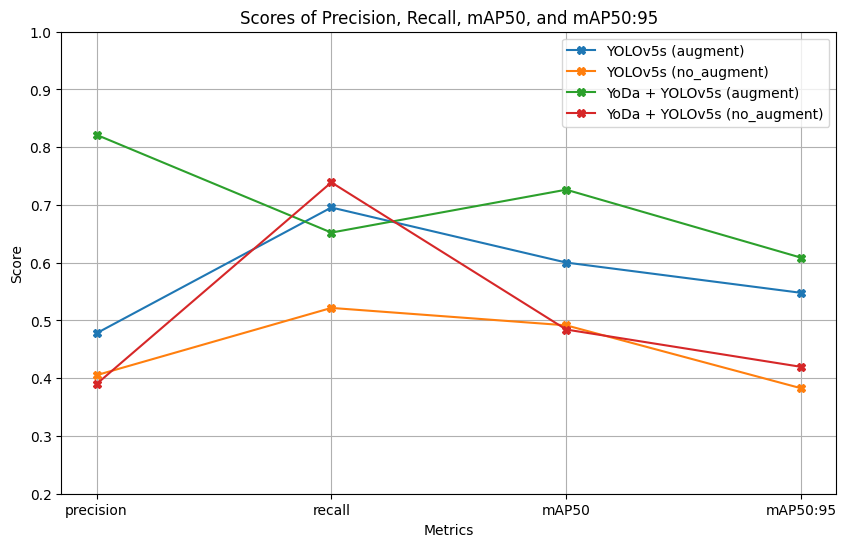

In [178]:
plot_(df_s, 's')

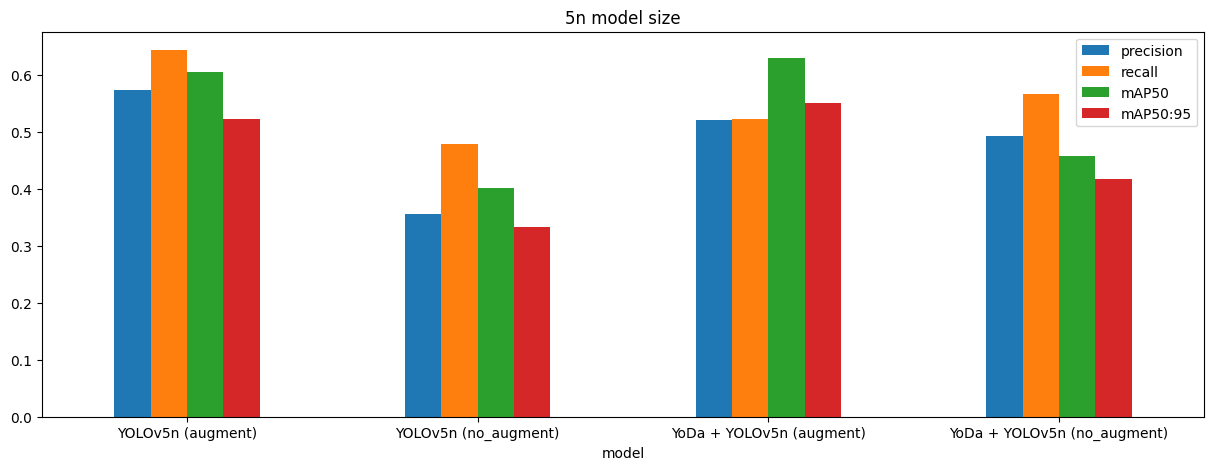

In [179]:
# plot bar plot for df_n
df_n = df_n.astype({'precision': 'float', 'recall': 'float', 'mAP50': 'float', 'mAP50:95': 'float'})
df_n.plot.bar(x='model', y=['precision', 'recall', 'mAP50', 'mAP50:95'], rot=0, figsize=(15,5), title='5n model size')
plt.show()

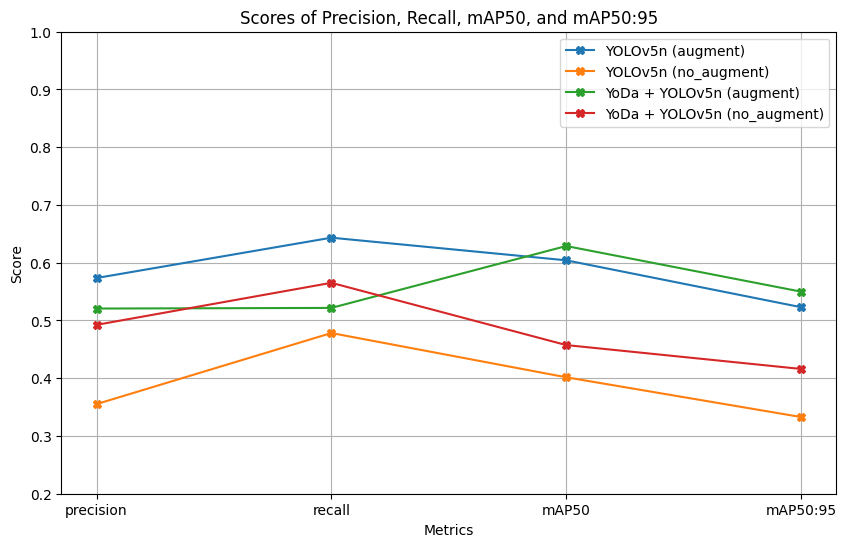

In [180]:
# plot line plot for df_n
plot_(df_n, 'n')